# Purchase Case Study

# Understanding the dataset

# **Understanding the dataset**

* **User_ID:**
  * **This column represents the unique identifier for each user or customer who made the purchase.**

* **Product_ID:**
  * **This column contains the unique identifier for each product that was purchased.**

* **Gender:**
  * **This column indicates the gender of the user who made the purchase. It could have values such as "Male" or "Female."**

* **Age:**
  * **This column represents the age group or category of the user who made the purchase. It can be categorized into different age ranges, such as "18-25," "26-35," "36-45," and so on.**

* **Occupation:**
  * **This column denotes the occupation of the user who made the purchase. It may include numerical or categorical values representing different professions or job types.**

* **City_Category:**
  * **This column categorizes the city or region from which the purchase was made. It typically includes labels like "A," "B," or "C" to represent different city categories or types.**

* **Stay_In_Current_City_Years:**
  * **This column indicates the number of years the user has been living in their current city. It may have values such as "0" for less than a year, "1" for one year, "2" for two years, and so on.**

* **Marital_Status:**
  * **This column represents the marital status of the user. It could be encoded as "0" for unmarried/single and "1" for married.**

* **Product_Category_1:**
  * **This column refers to the primary category of the purchased product. It may contain numerical or categorical values representing different product categories.**

* **Product_Category_2:**
  * **This column corresponds to the secondary category of the purchased product. It could also contain numerical or categorical values, but it is not necessarily present in all datasets.**

* **Product_Category_3:**
  * **This column represents the tertiary category of the purchased product. Similar to the previous column, it may include numerical or categorical values and might not be present in all datasets.**

* **Purchase:**
  * **This column contains the amount or value of the purchase made by the user. It represents the monetary value or quantity associated with the transaction.**

<hr>





# **Tasks to be performed**

1. **Need to perform a detailed EDA (Exploratory Data Analysis) to derieve useful inferences**


2. **Using Statistical Analysis, find out statistical evidence for the following:**

    * **It was observed that the average purchase made by the Men of the age 18-25 was 10000. Is it still the same?**
    
    * **It was observed that the percentage of women of the age that spend more than 10000 was 35%. Is it still the same?**
    
    * **Are the variances of the purchase amounts significantly different between men and women in the age group 18-25?**
    
    * **Is the percentage of men who have spent more than 10000 the same for the ages 18-25 and 26-35?**


In [ ]:
#Step

#Step 1
# Importing the Libraries

#Configuration Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Mandatory Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')


Encoding Libraries

In [ ]:
from sklearn.preprocessing import LabelEncoder

#Loading and Inspection of data

In [ ]:
df=pd.read_csv('purchase_data.csv')

#data inspection

In [ ]:
df.head().style.set_properties
{
**{    'background-color':'abcd2d0',
       'color':'black',
       'border-color':'black',
       'border-style':'solid'
}
}

{'background-color': 'abcd2d0',
 'color': 'black',
 'border-color': 'black',
 'border-style': 'solid'}

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


#Insights that we have driven



*   There are a lot of null values
*   There are a lot of categorical values that means we will need encoding




Shape Inspection

In [ ]:
a=df.shape #this returns you a tuple
print(f'The Data is having {a[0] } rows and {a[1]} columns')

The Data is having 22589 rows and 12 columns


# Information Inspection

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22589 entries, 0 to 22588
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     22589 non-null  int64  
 1   Product_ID                  22589 non-null  object 
 2   Gender                      22589 non-null  object 
 3   Age                         22589 non-null  object 
 4   Occupation                  22588 non-null  float64
 5   City_Category               22588 non-null  object 
 6   Stay_In_Current_City_Years  22588 non-null  object 
 7   Marital_Status              22588 non-null  float64
 8   Product_Category_1          22588 non-null  float64
 9   Product_Category_2          15374 non-null  float64
 10  Product_Category_3          6786 non-null   float64
 11  Purchase                    22588 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 2.1+ MB




*  There are quite a null values in Productcategory3 column
*   Sort with the null values inthe product category 3 columns


*   Work with the nulls
*   

*  Stay in current  city years Needs to be converted into numeric columns
*   Needs to encode







In [ ]:
df['Stay_In_Current_City_Years'].value_counts()

Stay_In_Current_City_Years
1     7919
3     4112
2     4023
4+    3531
0     3003
Name: count, dtype: int64

In [ ]:
#chaning the values for 4+ to 4
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].replace('4+','4')

In [ ]:

df['Stay_In_Current_City_Years'].value_counts()

Stay_In_Current_City_Years
1    7919
3    4112
2    4023
4    3531
0    3003
Name: count, dtype: int64

In [ ]:
#change the datatype for the columns

In [ ]:
df['Stay_In_Current_City_Years']=pd.to_numeric(df['Stay_In_Current_City_Years'],errors='coerce')
#errors=coerce will convert 4+ to Nan then it would change the data type to 4.Some datatypes do not get converted to numeric columns

In [ ]:
df['Stay_In_Current_City_Years'].value_counts()

Stay_In_Current_City_Years
1.0    7919
3.0    4112
2.0    4023
4.0    3531
0.0    3003
Name: count, dtype: int64

Working with the null values

In [ ]:
df.isnull().sum()

User_ID                           0
Product_ID                        0
Gender                            0
Age                               0
Occupation                        1
City_Category                     1
Stay_In_Current_City_Years        1
Marital_Status                    1
Product_Category_1                1
Product_Category_2             7215
Product_Category_3            15803
Purchase                          1
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

Shape Inspection

In [ ]:
a=df.shape
print(f'there are {a[0]}rows and {a[1]}columns')

there are 6786rows and 12columns


#Encoding of the data

Convert the categorical into numrical encoder

labelled encoder amd second is onehot encoder

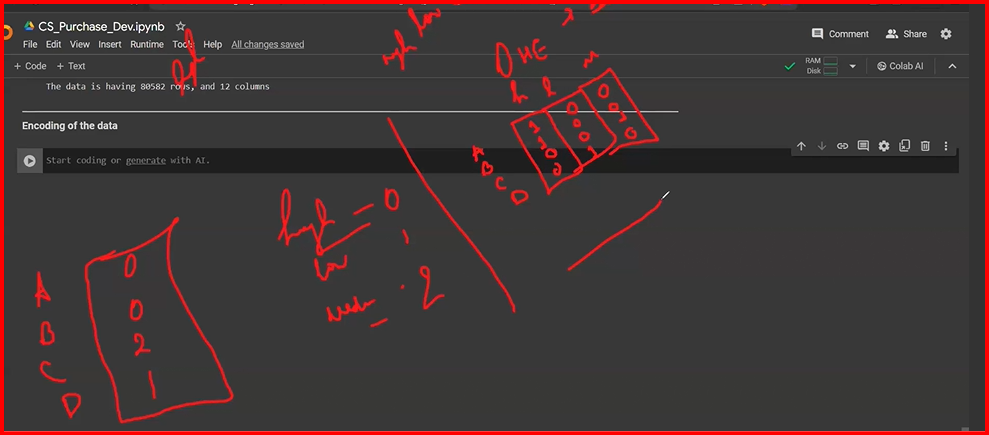

In [ ]:
#ordered encoding means in the order in the sequence like low ,medium,high or 0,1,2  unordered means dog,cat, apple no order

In [ ]:
#gender ,Age,City Category is having ordered category

In [ ]:
#creating a label encoder object
le=LabelEncoder()

In [ ]:
df['Gender'].value_counts()

Gender
M    5279
F    1507
Name: count, dtype: int64

In [ ]:
df['Gender']=le.fit_transform(df['Gender'])


In [ ]:
print('Gender',le.classes_)

Gender ['F' 'M']


In [ ]:
label_mapping=dict(zip(le.classes_,le.transform(le.classes_)))

In [ ]:
#print
for label,encoded_values in label_mapping.items():
  print(f'label:{label},encoded_values{encoded_values}')


label:F,encoded_values0
label:M,encoded_values1


In [ ]:
df['Gender'].value_counts()

Gender
1    5279
0    1507
Name: count, dtype: int64

In [ ]:
#we would try to encode user_id column,we try to encodeproduct_id column , We try to encode agecolumn as well

In [ ]:
#lets work with age columns  as well

In [ ]:
df['Age'].value_counts()

Age
26-35    2565
18-25    1521
36-45    1359
46-50     468
51-55     452
55+       220
0-17      201
Name: count, dtype: int64

In [ ]:
df['Age']=le.fit_transform(df['Age'])


In [ ]:
print('Age',le.classes_)

Age ['0-17' '18-25' '26-35' '36-45' '46-50' '51-55' '55+']


In [ ]:
label_mapping=dict(zip(le.classes_,le.transform(le.classes_)))
label_mapping

{'0-17': 0,
 '18-25': 1,
 '26-35': 2,
 '36-45': 3,
 '46-50': 4,
 '51-55': 5,
 '55+': 6}

City Encoding

In [ ]:
df['City_Category'].value_counts()

City_Category
B    2808
C    2246
A    1732
Name: count, dtype: int64

In [ ]:
df['City_Category']=le.fit_transform(df['City_Category'])

In [ ]:
label_mapping=dict(zip(le.classes_,le.transform(le.classes_)))
label_mapping

{'A': 0, 'B': 1, 'C': 2}

In [ ]:
df['Product_ID ']=le.fit_transform(df['Product_ID'])


In [ ]:
label_mapping=dict(zip(le.classes_,le.transform(le.classes_)))
label_mapping

{'P00000142': 0,
 'P00000242': 1,
 'P00000642': 2,
 'P00001042': 3,
 'P00001142': 4,
 'P00001542': 5,
 'P00002142': 6,
 'P00002242': 7,
 'P00003442': 8,
 'P00004242': 9,
 'P00004842': 10,
 'P00005942': 11,
 'P00006942': 12,
 'P00008042': 13,
 'P00010542': 14,
 'P00010742': 15,
 'P00010942': 16,
 'P00011942': 17,
 'P00012242': 18,
 'P00014642': 19,
 'P00014842': 20,
 'P00015542': 21,
 'P00015642': 22,
 'P00015842': 23,
 'P00015942': 24,
 'P00016342': 25,
 'P00016442': 26,
 'P00016542': 27,
 'P00016742': 28,
 'P00016842': 29,
 'P00019042': 30,
 'P00019342': 31,
 'P00021842': 32,
 'P00023342': 33,
 'P00024142': 34,
 'P00025242': 35,
 'P00025342': 36,
 'P00025442': 37,
 'P00026042': 38,
 'P00028442': 39,
 'P00028542': 40,
 'P00029542': 41,
 'P00030842': 42,
 'P00030942': 43,
 'P00031842': 44,
 'P00032042': 45,
 'P00034042': 46,
 'P00034142': 47,
 'P00034242': 48,
 'P00034442': 49,
 'P00034742': 50,
 'P00035042': 51,
 'P00035342': 52,
 'P00035542': 53,
 'P00035842': 54,
 'P00035942': 55,
 '

#We have completed the eda part or preprocessing the data

Statistical Summary

In [ ]:
df.describe()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_ID
count,6.786000e+03,6786.000000,6786.000000,6786.000000,6786.000000,6786.000000,6786.000000,6786.000000,6786.000000,6786.000000,6786.000000,6786.000000
mean,1.001755e+06,0.777925,2.384321,8.300619,1.075744,1.875626,0.388152,2.754937,6.963159,12.735780,11619.371500,219.620542
std,1.021952e+03,0.415672,1.337718,6.525713,0.761942,1.289092,0.487365,2.589630,4.513809,4.112731,5061.668049,137.747442
min,1.000001e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,186.000000,0.000000
25%,1.000890e+06,1.000000,1.000000,3.000000,0.000000,1.000000,0.000000,1.000000,2.000000,9.000000,7886.500000,106.000000
50%,1.001698e+06,1.000000,2.000000,7.000000,1.000000,2.000000,0.000000,1.000000,6.000000,15.000000,11703.000000,198.000000
75%,1.002663e+06,1.000000,3.000000,14.000000,2.000000,3.000000,1.000000,4.000000,10.000000,16.000000,15601.000000,343.000000
max,1.003539e+06,1.000000,6.000000,20.000000,2.000000,4.000000,1.000000,15.000000,16.000000,18.000000,23958.000000,487.000000


 Insights :

*    A Person on an average spends 9298 .
*   Mean is very much similar to median. Purchase column can be normally
  distributed column.



 # Visualisation

Age wise comparison between Male and Female

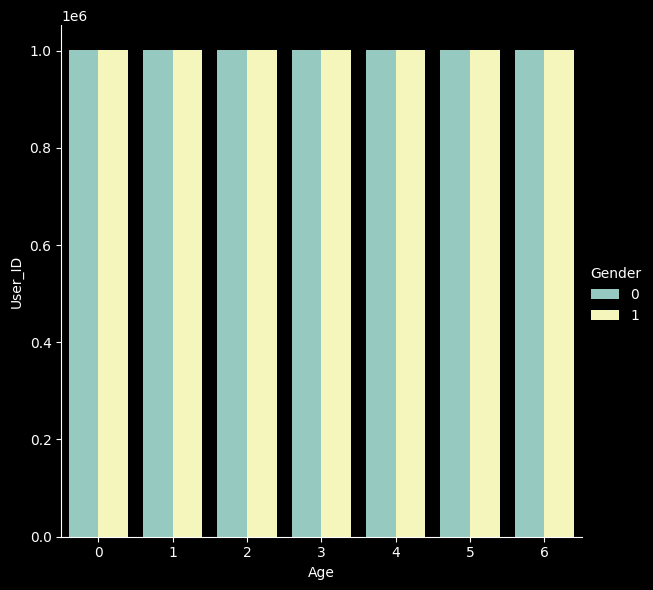

In [ ]:
fig =sns.catplot(data=df,x='Age',y='User_ID',hue='Gender',kind='bar',height=6)

# Insights

*  In between,  age groups 18 to 55 we have majority as  female customers
*   



Comparison by Marital Status

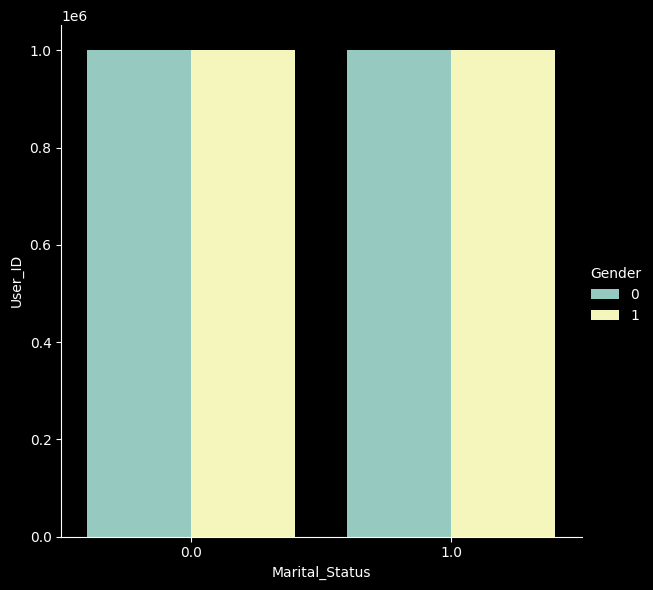

In [ ]:
fig =sns.catplot(data=df,x='Marital_Status',y='User_ID',hue='Gender',kind='bar',height=6)

This is unmarried column we are having more female consumers

# Frequency of items in Product category 1

<Axes: xlabel='Product_Category_1', ylabel='count'>

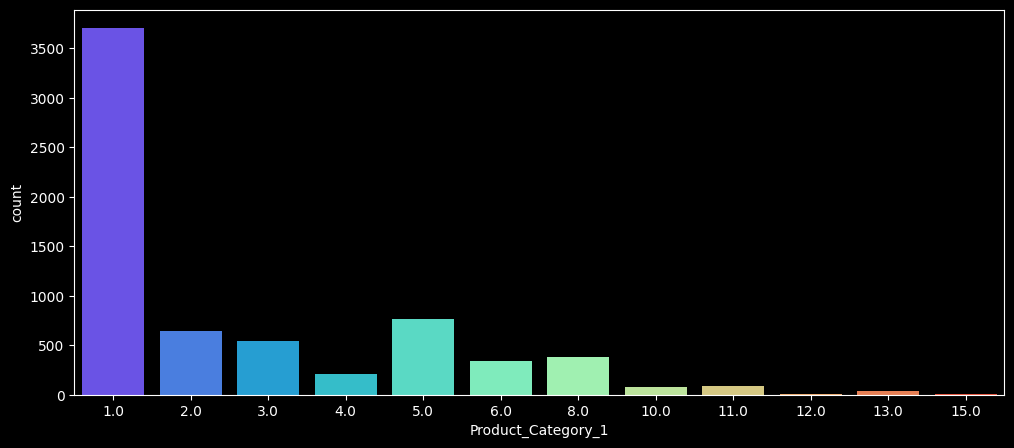

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x=df['Product_Category_1'],palette='rainbow')

# Frequency of items in Product category 2

<Axes: xlabel='Product_Category_2', ylabel='count'>

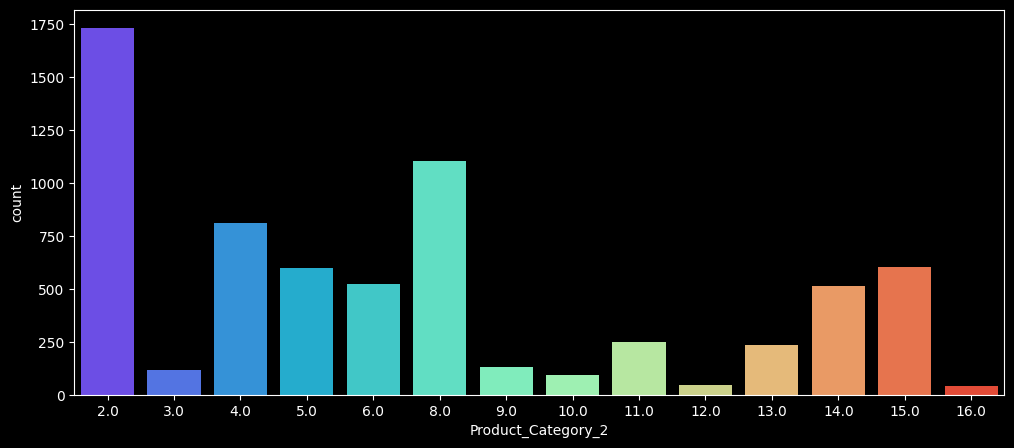

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x=df['Product_Category_2'],palette='rainbow')

# Frequency of items in Product category 3

<Axes: xlabel='Product_Category_3', ylabel='count'>

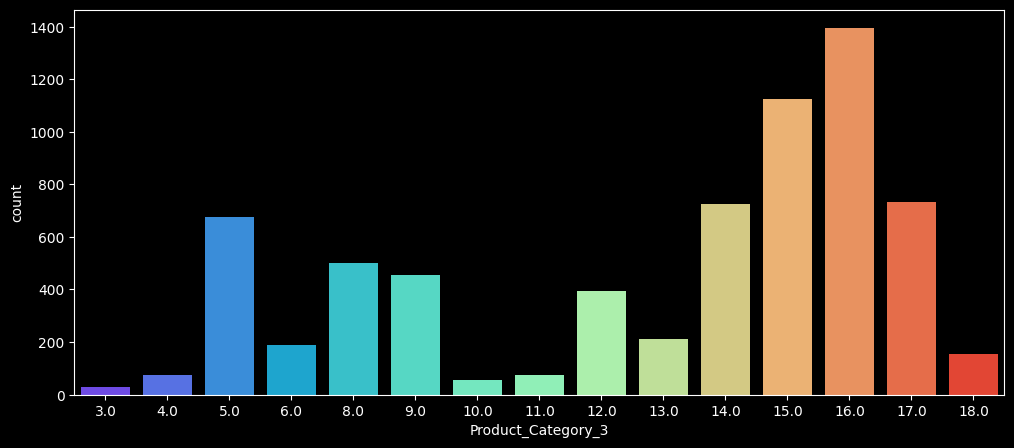

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x=df['Product_Category_3'],palette='rainbow')

# Category3 is more famous

Comparison for living years

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

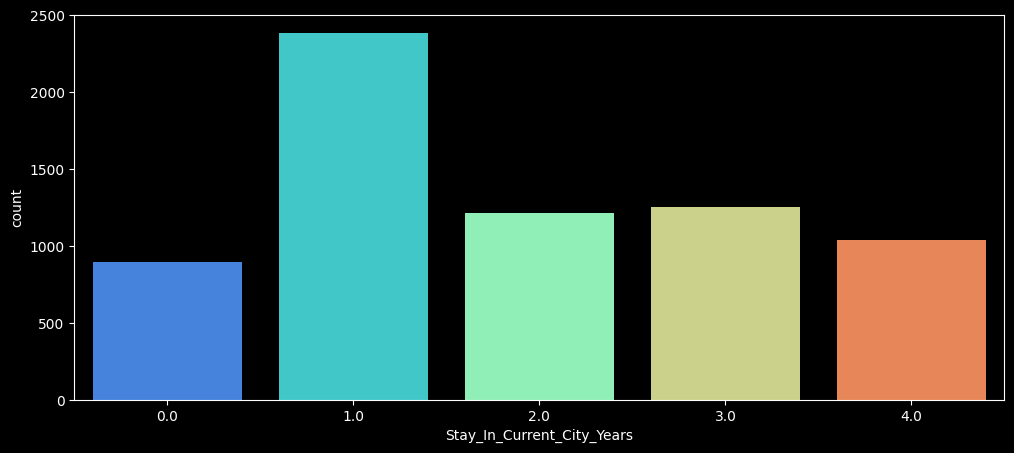

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x=df['Stay_In_Current_City_Years'],palette='rainbow')

Majority of consumers are new to the city

Statistical Tests

In [ ]:
a=df.groupby('Age').count()

In [ ]:
a.head()

,User_ID,Product_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_ID
Age,,,,,,,,,,,,
0,201,201,201,201,201,201,201,201,201,201,201,201
1,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521
2,2565,2565,2565,2565,2565,2565,2565,2565,2565,2565,2565,2565
3,1359,1359,1359,1359,1359,1359,1359,1359,1359,1359,1359,1359
4,468,468,468,468,468,468,468,468,468,468,468,468


In [ ]:
del a

It was observed that the average purchase made by the mean of the  age 18 -25 was 100000.Is it still th same?

Null Hypothesis:The mean is 10000.
Alternate Hypotheisis:THE MEAN IS NOT 10000.

WE NEED TO GRAB THE DATA FOR AGE_GROUP=1 AND GENDER=1.

In [ ]:
new_df=df.loc[(df['Age']==1)&df['Gender']==1]

In [ ]:
new_df.shape

(1186, 13)

In [ ]:
sample_df=new_df.sample(25,random_state=0)

In [ ]:
sample_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_ID
15246,1002270,P00295942,1,1,1.0,2,3.0,1.0,2.0,5.0,15.0,13112.0,411
9976,1001524,P00244142,1,1,4.0,1,1.0,0.0,1.0,2.0,15.0,11815.0,365
18380,1002896,P00042142,1,1,14.0,1,0.0,0.0,1.0,2.0,6.0,15278.0,61
17990,1002837,P00191442,1,1,0.0,1,1.0,0.0,1.0,2.0,15.0,15474.0,289
5415,1000881,P00138442,1,1,14.0,0,1.0,0.0,1.0,2.0,16.0,4501.0,192
14333,1002116,P00329542,1,1,4.0,1,4.0,1.0,1.0,15.0,16.0,15453.0,432
10841,1001655,P00035542,1,1,4.0,2,2.0,1.0,3.0,4.0,12.0,13365.0,53
10819,1001649,P00113242,1,1,19.0,2,2.0,1.0,1.0,6.0,8.0,19379.0,146
16367,1002522,P00080342,1,1,11.0,0,1.0,0.0,1.0,6.0,8.0,19309.0,110
10745,1001644,P00351142,1,1,12.0,0,2.0,0.0,1.0,8.0,17.0,11532.0,456


In [ ]:
proposed_mean=10000

Performing ttest for one sample

In [ ]:
from scipy.stats import ttest_1samp


In [ ]:
tstatistic,p_value=ttest_1samp(sample_df['Purchase'],proposed_mean)

In [ ]:
if p_value>0.05:
  print('Failed to  Reject the null hypotheisis.Using this we can conclude Men ofage group 18-25 are having an average purchaseof 10000')

else:
  print('Reject the null hypothesis.There is enough evidence to colclude that the average is 10000')


Failed to  Reject the null hypotheisis.Using this we can conclude Men ofage group 18-25 are having an average purchaseof 10000


In [ ]:
print(f'P_value{p_value}')

P_value0.06950126522214765


# It was observed that the percentage of women of the age that spend more than 10000 was 35%. Is it still the same?

In [ ]:
new_df2=df[(df['Purchase']>10000)]

In [ ]:
new_df2.shape

(30995, 12)

(30995, 12)

How many are females?

In [ ]:
count=new_df2['Gender'].value_counts()

In [ ]:
count

Gender
M    24695
F     6300
Name: count, dtype: int64

In [ ]:
#number of observations
nobs=len(new_df2['Gender'])

In [ ]:
#proportion in consideration :0.35
p0=0.35

Percentage distribution

In [ ]:
new_df2['Gender'].value_counts()/nobs

Gender
M    0.796741
F    0.203259
Name: count, dtype: float64

In [ ]:
#Null Hypothesis:The proportion of female is 35%.
#Alternate Hypothesis:The proportion of female is not 35%.

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

zstats,p_value=proportions_ztest(count,nobs,p0)


In [ ]:
if p_value>0.05:
  print('Failed to  Reject the null hypotheisis.Using this we conclude that there is enough evidences that the female proportions is 35%')

else:
  print('Reject the null hypothesis.There is not the enough evidence to conclude that the proportion is 35% ')

Reject the null hypothesis.There is enough evidence to colclude that the average is 10000
Reject the null hypothesis.There is enough evidence to colclude that the average is 10000


In [ ]:
print(f'p_value{p_value}')

p_value0.0


Are the variances of the purchase amounts significantly different between men and women in the age group 18-25?

** Null Hypothesis:Spend will be equal
   Alternate Hypothesis:Spend will not be equal.**


In [ ]:
new_df_men=df[(df['Gender']==1) & (df['Age']==1)]

new_df_men.shape

(0, 12)

In [ ]:
new_df_women=df[(df['Gender']==0) & (df['Age']==1)]

new_df_women.shape

(0, 12)

Sampling

In [ ]:
sample_men=new_df_men.sample(500,random_state=0)
sample_women=new_df_women.sample(500,random_state=0)

ValueError: a must be greater than 0 unless no samples are taken

Check for the variance

In [ ]:
a=sample_men['Purchase'].var()
b=sample_women['Purchase'].var()
print(f'Variance of Males:{a}')
print(f'Variance of Females:{b}')



NameError: name 'sample_men' is not defined